Total number of classes: 22
Class Distribution:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


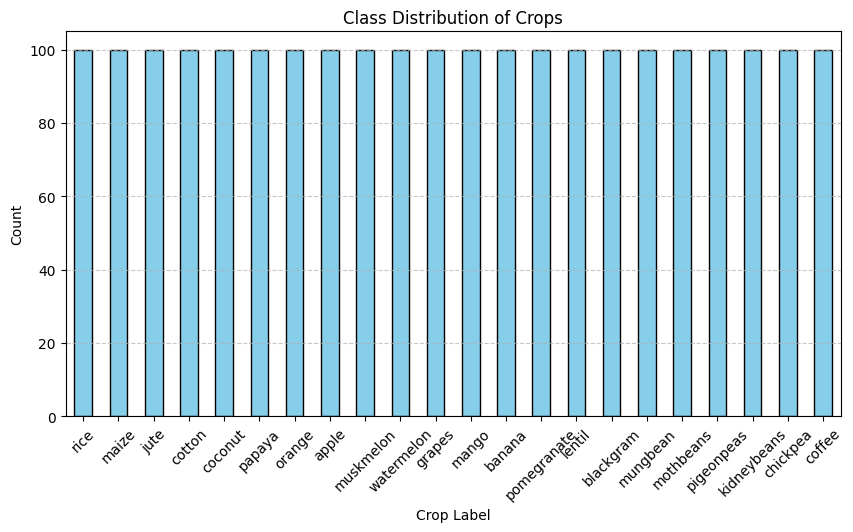

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/crops .csv"
data = pd.read_csv(file_path)

# Count occurrences of each class
class_counts = data['label'].value_counts()

# Count total number of unique classes
total_classes = data['label'].nunique()
print(f"Total number of classes: {total_classes}")


# Print class distribution
print("Class Distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Class Distribution of Crops')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






Dataset Head:
   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
1    21.770462  80.319644  7.038096  226.655537  rice
2    23.004459  82.320763  7.840207  263.964248  rice
3    26.491096  80.158363  6.980401  242.864034  rice
4    20.130175  81.604873  7.628473  262.717340  rice
Cross-validation Accuracy: 95.39% (+/- 0.95%)
Test Accuracy: 96.36%
Training Accuracy: 98.83%

Test Set Classification Report:
              precision    recall  f1-score   support

       apple       0.86      1.00      0.92        30
      banana       1.00      0.97      0.98        30
   blackgram       0.97      1.00      0.98        30
    chickpea       1.00      0.97      0.98        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.91      1.00      0.95        30
      grapes       1.00      0.97      0.98        30
        jute       0.94      1.00      0.97     

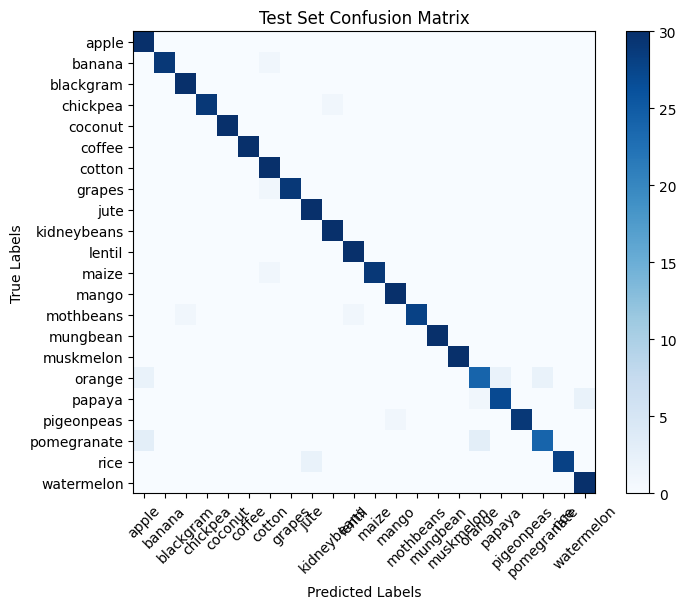

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Inspect the dataset
print("Dataset Head:")
print(data.head())

# Separate features and target
X = data[['temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Cross-validation setup on the training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 2 * 100:.2f}%)")

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Test the model on the holdout test set
y_test_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Classification report and confusion matrix
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
plt.show()







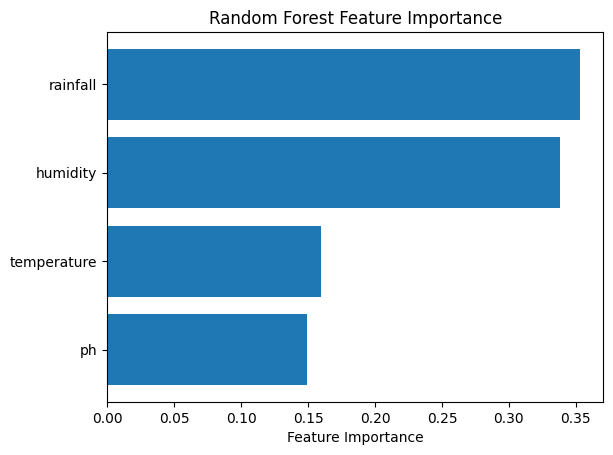

In [5]:
feature_importance = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def predict_top_crops(sample, top_n=10):
    # Convert the sample to a DataFrame with feature names
    sample_df = pd.DataFrame([sample], columns=['temperature', 'humidity', 'ph', 'rainfall'])

    # Get probability scores
    probabilities = rf_model.predict_proba(sample_df)[0]
    top_indices = np.argsort(probabilities)[-top_n:][::-1]
    top_crops = [label_encoder.classes_[i] for i in top_indices]

    print("Top recommended crops:")
    print(", ".join(top_crops))  # Print as a comma-separated list

# Test with an example
sample_input = [28.97, 78.96, 5.5, 0.187]  # Example input: temperature, humidity, pH, rainfall
predict_top_crops(sample_input)


Top recommended crops:
muskmelon, mungbean, mothbeans, banana, grapes, watermelon, lentil, orange, papaya, mango
